In [1]:
import pandas as pd
from functions import *
import numpy as np

In [65]:
X_train_z = pd.read_csv('X_train_z')
X_test_z = pd.read_csv('X_test_z')
y_train_z = pd.read_csv('y_train')
y_test_z = pd.read_csv('y_test')

In [66]:
y_train = y_train_z.duracion_baja
y_test = y_test_z.duracion_baja

In [2]:
from category_encoders.target_encoder import TargetEncoder

In [67]:
X_train_z = X_train_z.iloc[:,1:]
X_test_z = X_test_z.iloc[:,1:]

In [70]:
X_train_z['icd9'] = X_train_z.apply(lambda row: make_icd9_cat(row), axis=1)
X_test_z['icd9'] = X_test_z.apply(lambda row: make_icd9_cat(row), axis=1)

In [69]:
X_train_z = X_train_z.astype({'icd9': str})
X_test_z = X_test_z.astype({'icd9': str})

In [43]:
enc = TargetEncoder().fit(X_train_z, y_train)

/root/.pyenv/versions/3.10.6/envs/smarthealing/lib/python3.10/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/root/.pyenv/versions/3.10.6/envs/smarthealing/lib/python3.10/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [44]:
X_train_z = enc.transform(X_train_z)
X_test_z = enc.transform(X_test_z)

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [72]:
y_log_train = np.log(y_train)
y_log_test = np.log(y_test)
model_ridge_1 = Ridge()
cv_results_ridge_1 = cross_validate(model_ridge_1, X_train_z, y_log_train, cv=5,
                            scoring=["max_error",
                                     "r2",
                                     "neg_mean_absolute_error",
                                     "neg_mean_squared_error",
                                     "neg_root_mean_squared_error"]
)
pd.DataFrame(cv_results_ridge_1)
ridge_val_rmse = np.exp(cv_results_ridge_1["test_neg_root_mean_squared_error"].mean()*(-1))
ridge_val_r2 = cv_results_ridge_1["test_r2"].mean()
model_ridge_1.fit(X_train_z, y_log_train)
y_pred_ridge_1 = model_ridge_1.predict(X_test_z)
ridge_train_rmse = np.exp(mean_squared_error(y_log_test, y_pred_ridge_1, squared = False))
print(f"Validation R2= {np.round(ridge_val_r2, 2)}, validation rmse= {np.round(ridge_val_rmse, 2)}, and training rmse= {np.round(ridge_train_rmse, 2)}")

Validation R2= -0.0, validation rmse= 4.34, and training rmse= 4.34


In [73]:
X_train_z.head()

,icd9,numtreb,ContadordiasBajasDNI,tiempo_en_empresa,edad,icd9_cat,sin_time,cos_time,sexo_2,recaida_1,grupcoti_1,grupcoti_10,grupcoti_11,grupcoti_2,grupcoti_3,grupcoti_4,grupcoti_5,grupcoti_6,grupcoti_7,grupcoti_8,grupcoti_9,pluriempleo_1,cnae_cat_1,cnae_cat_2,cnae_cat_3,cnae_cat_4,cnae_cat_5,cnae_cat_6,cnae_cat_7,cnae_cat_8,cnae_cat_9,cnae_cat_10,cnae_cat_11,cnae_cat_12,cnae_cat_13,cnae_cat_14,cnae_cat_15,cnae_cat_16,cnae_cat_17,cnae_cat_18,cnae_cat_19,cnae_cat_20,cnae_cat_21,Code_1,Code_2,Code_3,Code_4
0,389,0.281690,0.333333,-0.196833,0.752915,6,0.565802,-0.824541,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,724,-0.246479,-0.192982,0.635747,0.221179,13,0.344309,-0.938856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,724,22.190141,0.140351,0.472851,0.522496,13,-0.824541,-0.565802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,789,4.042254,1.807018,-0.346154,-0.860017,16,0.993973,0.109621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,460,1.422535,10.789474,0.133484,0.150281,8,0.362299,0.932062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df = get_data()
df = clean_data(df, columns=[])
X, y = get_X_y(df)

/root/code/davnak/smarthealing/smarthealing_mod/functions.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';')


there is a total of 245720 entries, the target mean is 26.241856584730588


In [4]:
X['icd9'] = X.apply(lambda row: make_icd9_cat(row), axis=1)

In [7]:
X = X.astype({'icd9': str})

In [9]:
X_train, X_test, y_train, y_test = make_train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
enc = TargetEncoder().fit(X_train, y_train)

/root/.pyenv/versions/3.10.6/envs/smarthealing/lib/python3.10/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/root/.pyenv/versions/3.10.6/envs/smarthealing/lib/python3.10/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [11]:
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [15]:
model_ridge_1 = Ridge()
model_ridge_1.fit(X_train, y_train)

Ridge()

In [16]:
model_ridge_1.score(X_test, y_test)

0.25911552589498565

In [38]:
X_train.head()

,ContadorBajasCCC,ContadorBajasDNI,sexo,cnae,icd9,recaida,numtreb,codipostal,ContadordiasBajasDNI,contracte,grupcoti,pluriempleo,diasemana,tiempo_en_empresa,edad,mes_baja,epiweek
170446,13,5,2,4639,2.828570,1,10,18.505246,9,19.214123,22.767590,0,2,0.27,23.5,5,21
52619,390,7,1,2829,6.361508,0,210,30.064457,12,21.208890,25.896818,0,2,9.07,36.8,3,11
100262,111,1,1,9321,32.546046,0,12,26.621871,1,26.041300,23.160358,0,6,0.11,27.0,7,27
228709,14,2,1,4721,19.638350,0,6,13.541317,40,21.208890,25.009869,0,3,1.56,33.3,6,24
125361,56,6,2,6512,29.071603,0,25,25.959459,58,26.499396,24.033154,0,2,3.57,55.8,3,13


In [41]:
X_train.icd9 = np.log(X_train.icd9)

In [23]:
from xgboost import XGBRegressor
import multiprocessing
from sklearn.model_selection import GridSearchCV

In [43]:
xgb_model = XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2,
                         max_depth= 4, n_estimators= 100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [44]:
xgb_model.score(X_test, y_test)

-10.714685249778327

<AxesSubplot: >

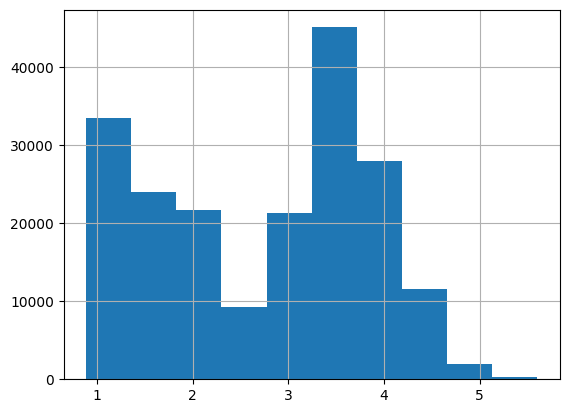

In [42]:
X_train.icd9.hist()